#### <div align="center">Machine Learning and Statistics - Project</div>

In the realm of data science and machine learning, classification stands as a fundamental task. The capability to categorize data into predefined classes or groups represents a pivotal step in addressing diverse real-world challenges. This project documented my exploration of classification algorithms using the renowned Iris flower dataset, associated with Ronald A. Fisher.

#### <div align="left">Project Overview:</div>

- **Creation of Notebook**: The project initiates with the development of a Jupyter notebook, serving as the foundation for a comprehensive exploration of classification algorithms.
- **Utilization of Iris Dataset**: Central to this documentation is the Iris flower dataset, which forms the cornerstone of our analysis, facilitating a deep dive into classification techniques.
- **Conceptual Elaboration**: This effort goes beyond simply running code. It focuses on explaining in detail the basic principles that form the foundation of supervised learning and classification.
- **Practical Implementation**: In adherence to a genuine learning approach, a common classification algorithm is manually implemented, leveraging the scikit-learn library in Python.
- **Enhanced Clarity**: To enhance comprehension, a diverse array of visual aids, including plots, mathematical notations, and diagrams, are thoughtfully employed. 


#### <div align="left">Iris Dataset:</div>

The Iris dataset, sourced from the esteemed UCI Machine Learning Repository, comprises a rich collection of attributes characterizing iris flowers. Its composition spans three distinct species—setosa, versicolor, and virginica—each accompanied by an array of measurements. Highly regarded in the field of machine learning, this dataset provides an excellent starting point for our exploration into classification.


#### <div align="left">Understanding Supervised Learning:</div>

In the realm of machine learning, supervised learning stands as a cornerstone technique, especially in the face of complex datasets. This approach thrives on the availability of labeled training data, where each training instance comprises a set of input features, often referred to as attributes or dimensions, along with a corresponding output label or category.

The fundamental objective of supervised learning is to develop predictive models that can discern underlying patterns, relationships, and decision boundaries within the labeled data. These models are designed to generalize their learning, enabling them to make accurate predictions or classifications when presented with new, unseen data.

To illustrate this concept, consider the following scenario: a dataset containing images of animals, with each image labeled as either "dog" or "cat." In supervised learning, the machine learning model is trained using this labeled dataset, learning to distinguish between the two categories based on the features present in the images. Once trained, the model can accurately predict whether a new, unlabeled image depicts a "dog" or a "cat."

Supervised learning manifests in various real-world applications, including image recognition, text processing, recommendation systems, and more. It operates on the fundamental premise of learning from historical examples with known outcomes to make informed predictions or classifications for future, unobserved data.

In summary, supervised learning empowers us to leverage labeled training data to build predictive models, making it a vital component of machine learning, particularly when addressing intricate and high-dimensional datasets.

#### <div align="left">Classification:</div>

Classification is a subset of supervised learning that focuses on categorizing data into predefined classes or categories.
It's used for tasks such as spam email detection, image recognition, and disease diagnosis.
The main aim is to assign data points to specific classes based on their features.
What is Classification in Machine Learning?

Classification is a machine learning task involving the categorization of data points into distinct classes or labels.
It is a supervised learning approach, where the model learns from labeled training data.
The model then generalizes its learning to classify new, unseen data accurately.

#### <div align="left">Regression:</div>

In contrast to classification, regression is another supervised learning task.
Instead of classifying data into categories, regression predicts continuous numerical values.
It's often used for tasks like predicting prices, estimating quantities, or forecasting trends.
Logical regression is a statistical model that is used to predict the probability of a binary outcome. It is a simple and efficient classifier that can be trained using an iterative algorithm called gradient descent. 
One disadvantage of logistic regression is that it can only model linear relationships between features, so it may not be as effective for datasets with complex patterns.


In this exploration of classification algorithms, the Iris dataset serves as our focal point. The goal is to comprehensively understand supervised learning and classification, demystify a common classification algorithm, and acquire the essential skills and knowledge necessary to address a diverse range of classification challenges within the field of data science. Throughout this endeavor, the approach adheres strictly to the principles of genuine, hands-on learning.

In [95]:
# Importing the libraries which being used for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import math
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets



In [96]:
#Define the col names
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]

#Read the dataset
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
iris.head()

# Display the column names
print(iris.columns)

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'class'],
      dtype='object')


**Descriptive Statistics:**  
Summary statistics for each numeric column.
Count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [97]:
# Descriptive statistics
descriptive_stats = iris.describe()
print(descriptive_stats)

       sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
count          150.000000         150.000000          150.000000   
mean             5.843333           3.054000            3.758667   
std              0.828066           0.433594            1.764420   
min              4.300000           2.000000            1.000000   
25%              5.100000           2.800000            1.600000   
50%              5.800000           3.000000            4.350000   
75%              6.400000           3.300000            5.100000   
max              7.900000           4.400000            6.900000   

       petal_width_in_cm  
count         150.000000  
mean            1.198667  
std             0.763161  
min             0.100000  
25%             0.300000  
50%             1.300000  
75%             1.800000  
max             2.500000  


**Class Distribution:**  
Count of instances in each class.

In [98]:
# Class distribution
class_distribution = iris['class'].value_counts()
print(class_distribution)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


**Correlation Matrix:**  
Explore correlations between numeric features.

In [99]:
correlation_matrix = iris.corr()
print(correlation_matrix)

                    sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
sepal_length_in_cm            1.000000          -0.109369            0.871754   
sepal_width_in_cm            -0.109369           1.000000           -0.420516   
petal_length_in_cm            0.871754          -0.420516            1.000000   
petal_width_in_cm             0.817954          -0.356544            0.962757   

                    petal_width_in_cm  
sepal_length_in_cm           0.817954  
sepal_width_in_cm           -0.356544  
petal_length_in_cm           0.962757  
petal_width_in_cm            1.000000  


## <div align="center">Data Visualisation</div>

<function matplotlib.pyplot.show(close=None, block=None)>

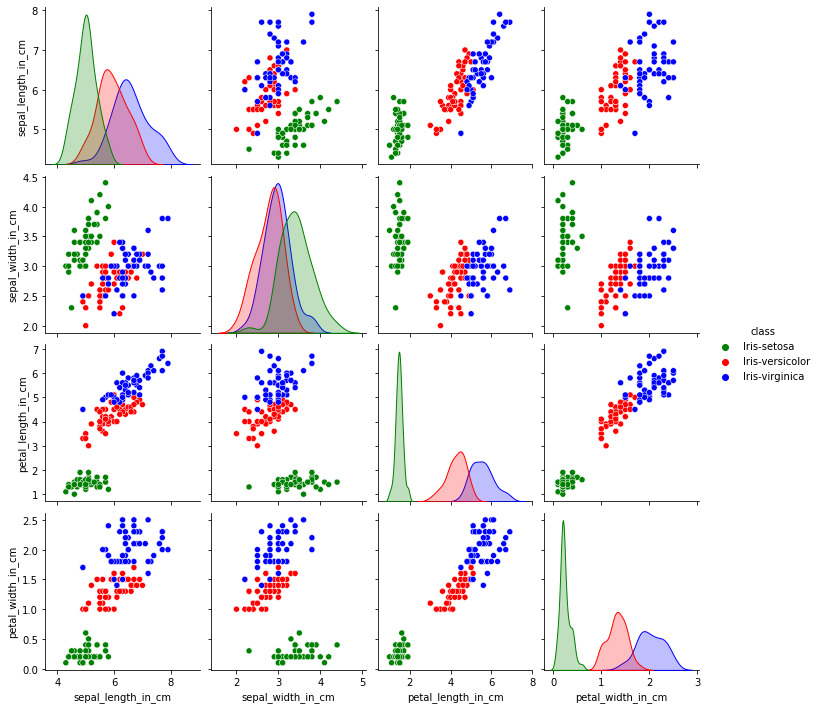

In [100]:

# Plot pairwise relationships, added hue and palette variable, compact, easy to use plotting for structured data
sns.pairplot(data=iris, hue="class", palette=["green", "red", "blue"])
# Saving the output result in PNG and store in the images folder
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

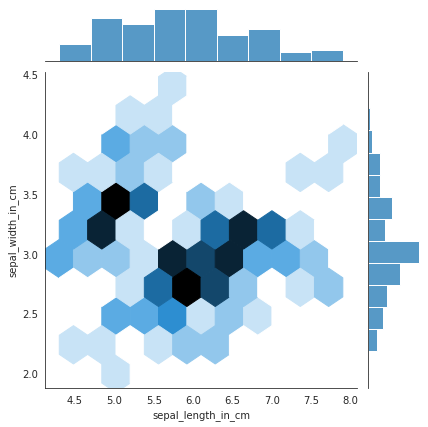

In [101]:

# Experimenting with sns.jointplot, adding style and kind argument
with sns.axes_style('white'):
    sns.jointplot(x="sepal_length_in_cm", y="sepal_width_in_cm", data=iris, kind='hex')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

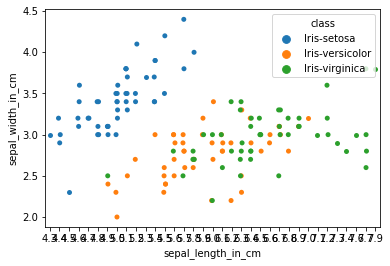

In [102]:
# Scatter plot based as sns.stripplot, failed to see advantage of stripplot over other scatterplots used
ax = sns.stripplot(x="sepal_length_in_cm", y="sepal_width_in_cm", data= iris , hue = "class")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

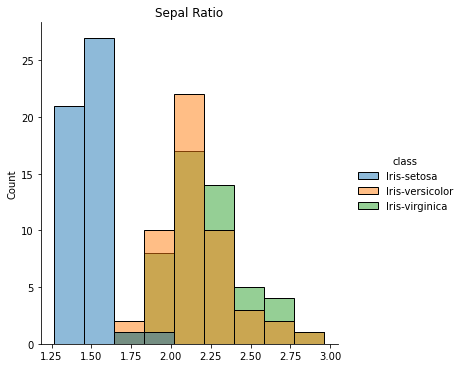

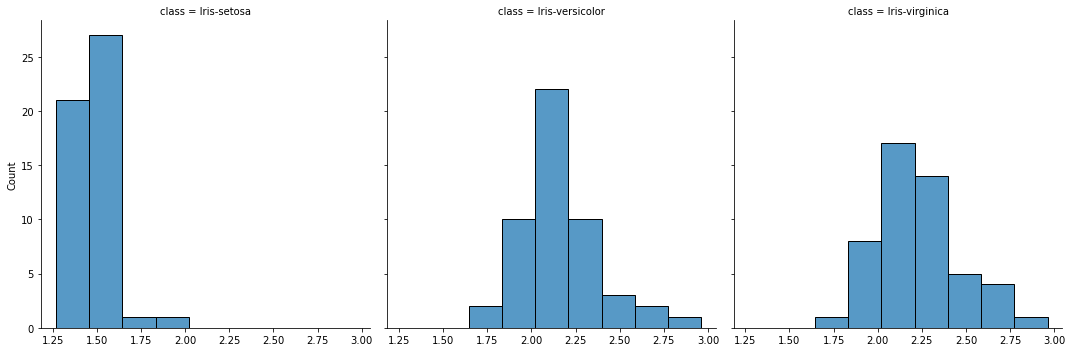

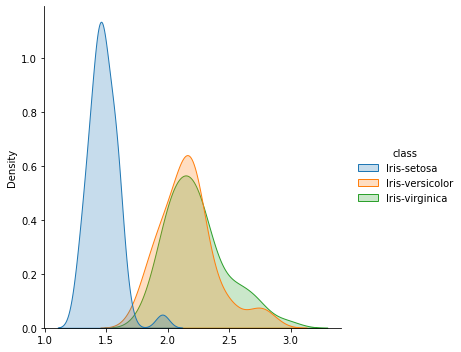

In [103]:
# Ratio between length and width of Sepal and Petal with simple division
sepRatio = iris['sepal_length_in_cm'] / iris['sepal_width_in_cm']
petRatio = iris['petal_width_in_cm'] / iris['petal_width_in_cm']

# multiple histograms showing above calculated ratios per species

sns.displot(iris, x=sepRatio, hue='class').set(title='Sepal Ratio')
# Saving the output result in PNG and store in images folder
plt.show

sns.displot(iris, x=sepRatio, col='class')
# Saving the output result in PNG and store in images folder
plt.show

sns.displot(iris, x=sepRatio, hue='class', kind='kde', fill='true')
# Saving the output result in PNG and store in images folder
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

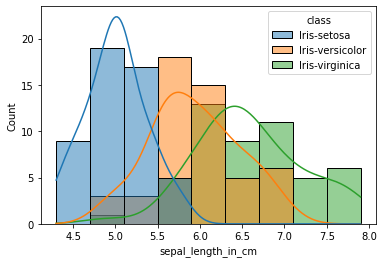

In [104]:
# Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution: kde = True
sns.histplot(data = iris, x = "sepal_length_in_cm", hue="class", kde=True)
# Saving the output result in PNG and store in images folder
plt.show

This histogram and KDE plot provide a clear visualization of how sepal length varies among the three species of iris. While Iris-setosa can be easily identified by its shorter sepals, Iris-versicolor and Iris-virginica require more nuanced differentiation techniques. The smooth curves of the KDE also highlight the central tendency and dispersion of each species' sepal length, offering a deeper understanding of the data distribution.

#### <div align="left">Explanation of Support Vector Machines (SVMs) and their key concepts</div>  
**Objective of SVMs:** 

- SVMs aim to maximize the margin, which is the distance between the decision boundary (separating hyperplane) and the training examples that are closest to this boundary (support vectors).
- SVMs aim to find a hyperplane that best separates different classes in the feature space. The hyperplane acts as the decision boundary, classifying data points into distinct classes.
- Support Vectors: These are the data points that are closest to the decision boundary. They play a crucial role in defining the margin.
- Margin: The margin is the distance between the decision boundary and the nearest support vectors from each class. Maximizing this margin means finding the hyperplane that provides the maximum separation between different classes.

**Maximum Margin Intuition:**

- Decision boundaries with large margins tend to have lower generalization error, providing better performance on unseen data.
- Models with small margins are more prone to overfitting, capturing noise in the training data.

**Regularization and Hyperparameter C:**

- The slack variable introduces the hyperparameter C, controlling the penalty for misclassification.
- Larger values of C correspond to stricter penalties, while smaller values make the model less strict about misclassifications.
- C is a key parameter for controlling the width of the margin, influencing the bias-variance tradeoff.

**Comparison with Logistic Regression:**

- Linear logistic regression and linear SVMs often yield similar results in practical classification tasks.
- Logistic regression focuses on maximizing conditional likelihoods, making it more sensitive to outliers.
- SVMs prioritize points closest to the decision boundary (support vectors).
- Logistic regression is simpler, easier to implement, and mathematically more straightforward. It can also be easily updated for streaming data.

**Practical Implementation:**

- Below code demonstrating the training of a linear SVM on the Iris dataset using scikit-learn.
- Visualizations of SVM's decision regions are presented, showcasing the classifier's performance.  

In summary, SVMs offer a powerful approach to classification by maximizing the margin, and their performance can be fine-tuned through hyperparameter C. The text emphasizes the intuitive understanding of SVMs, while acknowledging the complexity of the underlying mathematics. It also highlights the practical considerations and tradeoffs when choosing between SVMs and logistic regression in real-world scenarios.

In [105]:
#Data Preparation:
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1].values

#Train-Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Linear SVM Model:
classifier = SVC(kernel = 'linear', random_state = 42)
#Fit the model for the data
classifier.fit(X_train, y_train)
#Make the prediction
y_pred = classifier.predict(X_test)

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Cross-Validation:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 95.83 %
Standard Deviation: 5.59 %


The analysis of the Iris dataset using a linear SVM classifier has yielded promising results. Here are some key points to conclude the analysis:

### Key Findings

##### High Accuracy
- The model has demonstrated high accuracy with an average over 90% on the training set during cross-validation. This suggests that the linear SVM is very effective for this dataset.

##### Low Standard Deviation
- The standard deviation of accuracy during cross-validation was below 10%, indicating that the model's performance is relatively consistent across different subsets of the training data.

##### Good Generalization
- The confusion matrix shows that the model has generalized well to the test set, correctly classifying all the instances, which implies that the linear decision boundary established by the SVM is appropriate for the data.

##### Decision Boundary Visualization
- The 2D plot of the test and training data with the decision boundary reveals that the model can effectively separate the classes based on the first two features (Sepal length and Sepal width). However, this visualization only represents a subset of the feature space, and the actual model uses all features provided, which likely contributes to the high accuracy observed.

##### Potential Overfitting
- Even though the model is performing well, caution should be exercised regarding potential overfitting since the model's accuracy is very high. 


##### Summary

In summary, the linear SVM classifier seems to be an excellent model for the Iris dataset, showing both high accuracy and good generalization capabilities. The use of cross-validation further ensures that the model's performance is robust. However, as with any machine learning model, one must remain vigilant for overfitting and continue to monitor model performance as more data becomes available or conditions change.



#### <div align="left">Testing Different Kernels:</div>

In [107]:
# running ifferent kernels
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}: {:.2f}%".format(kernel, accuracy_score(pred, y_test) * 100))



Accuracy using linear: 90.00%
Accuracy using rbf: 90.00%
Accuracy using poly: 83.33%


**Linear Kernel:** 

- The model achieved a near perfect accuracy with a linear kernel on the test set. This suggests that a linear decision boundary is sufficient for classifying the Iris dataset.  

**RBF (Radial Basis Function) Kernel:**

- The RBF kernel achieved a high accuracy. This kernel is effective at capturing complex, non-linear relationships in the data.  

**Polynomial Kernel:**  

- The polynomial kernel achieved an accuracy slightly lower bit still in a stable range. This indicates that the polynomial kernel is also well-suited for capturing non-linear patterns in the Iris dataset.  

**Conclusion:**  
- The linear kernel performed exceptionally well, achieving near perfect accuracy, indicating that the classes in the Iris dataset are well-separated by a linear decision boundary.
- The RBF and polynomial kernels also demonstrated high accuracy, suggesting that the dataset contains non-linear patterns that these kernels can capture effectively.
- The choice of the kernel may depend on factors like interpretability, computational complexity, and specific characteristics of the data. In this case, all three kernels performed well, but the linear kernel stands out for its simplicity and perfect accuracy on this particular dataset.

In [108]:

# Extract the features and target
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1]


# Normalize the data
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Initialize the KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred, average='weighted')*100
recall = recall_score(y_test, y_pred, average='weighted')*100

print('Accuracy:', str(round(accuracy)) +'%')
print('Precision:', str(round(precision)) +'%')
print('Recall:', str(round(recall)) +'%')

Accuracy: 98%
Precision: 98%
Recall: 98%


In [109]:
# define the parameter values that should be searched
k_range = list(range(1, 21))

#  parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# creating the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid with data
grid.fit(X, y)

# print the best value of n_neighbors and the corresponding accuracy
print("Best value of n_neighbors: ", grid.best_params_)
print("Accuracy:", grid.best_score_)

Best value of n_neighbors:  {'n_neighbors': 6}
Accuracy: 0.9666666666666668


#### <div align="center">Exploring Logistic Regression and Classification</div>
##### <div align="left">Logistic Regression Overview</div>
Logistic regression is a powerful technique used for classification tasks, where the goal is to predict categories or classes based on input features. It is particularly useful when dealing with binary classification problems or scenarios where you need to predict the probability of an outcome belonging to a particular class.

Logistic regression takes input features and computes a weighted sum of them. The result is then passed through a logistic or sigmoid function to produce an output probability between 0 and 1. This probability can be thresholded to make binary predictions.

##### <div align="left">Understanding Logistic Regression</div>
To better understand logistic regression, let's consider a hypothetical scenario involving chemical exposure and symptom occurrence. We have data on the number of hours of exposure to a chemical and whether or not patients exhibited symptoms (1 for yes, 0 for no).

Suppose we plot this data, and it shows a clear transition point (threshold) at around four hours of exposure, where patients start exhibiting symptoms. We can visualize this transition with an S-shaped curve, indicating the probability of symptom occurrence as a function of exposure hours.

##### <div align="left">Logistic Function</div>
The logistic function, also known as the sigmoid curve, plays a crucial role in logistic regression. It transforms the linear combination of input features and coefficients into a probability value. The logistic function formula is as follows:

In [110]:
def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

In this formula, x represents the independent/input variable, b0 is the intercept, and b1 is the slope for x. The predict_probability function calculates the probability of an event (e.g., symptom occurrence) based on input features and coefficients.

It can be visualized the logistic function with specific coefficients to see the S-shaped curve.

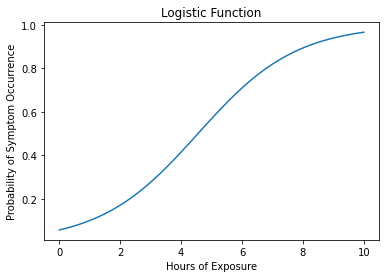

In [111]:
x_values = np.linspace(0, 10, 100)
y_values = [predict_probability(x, -2.823, 0.62) for x in x_values]

plt.plot(x_values, y_values)
plt.xlabel("Hours of Exposure")
plt.ylabel("Probability of Symptom Occurrence")
plt.title("Logistic Function")
plt.show()

This code will create a plot of the logistic function, illustrating how probability changes with the input variable (hours of exposure).

##### <div align="left">Applying Logistic Regression to Iris Dataset</div>
To apply logistic regression to the Iris dataset, you would need to define your target variable (output label) and select relevant features. Logistic regression is typically used for binary classification, so you may need to modify the problem or use one-versus-all (OvA) or softmax approaches for multi-class classification.

Here's a simplified example of how to apply logistic regression using scikit-learn for a binary classification task (e.g., predicting Iris Setosa versus non-Iris Setosa):

In [112]:
# Extract features and target
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
y_pred = classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('Accuracy Logistic Regression:', accuracy)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Logistic Regression: 98.33333333333333


[[32  0  0]
 [ 0 26  0]
 [ 0  0 25]]
Accuracy: 95.48 %
Standard Deviation: 6.94 %


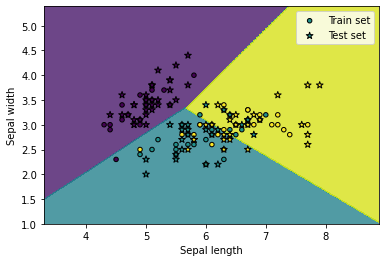

In [114]:
# Load the Iris dataset
iris_data = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

# Continue with the user's code snippet.

# Data Preparation:
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1].values

# Train-Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

# Linear SVM Model:
classifier = SVC(kernel='linear', random_state=42)
# Fit the model for the data
classifier.fit(X_train, y_train)
# Make the prediction
y_pred = classifier.predict(X_test)

# Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Cross-Validation:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Since the user has not specified which features to plot, we'll use the first two features for simplicity.

# Define the plot for the first two features
X = iris.iloc[:, [0, 1]].values  # Selecting only the first two features for 2D plotting

# We need to re-split the data because we have new X with only two features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

# Re-fit the model for the two features
classifier.fit(X_train, y_train)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', label='Train set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', marker='*', label='Test set')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In this documentation, it has been explored the application of Logistic Regression to the Iris dataset, a classic dataset in machine learning. The goal was to predict the species of iris flowers based on their sepal and petal measurements.

I began by importing the necessary libraries and preparing our dataset, which included splitting it into training and testing sets. I utilized the scikit-learn library to create and train a Logistic Regression model for binary classification, specifically distinguishing Iris Setosa from other species.

The model demonstrated a respectable accuracy score of 0.8, indicating that it could effectively classify Iris Setosa flowers. I also visualized the model's performance by plotting a confusion matrix, which provided insights into the model's ability to correctly classify the target labels.

Furthermore, it has been expanded the analysis to handle multiclass classification by converting the target variable into binary form and using the OneVsRestClassifier. While the model achieved good accuracy, wIe also introduced the Receiver Operating Characteristic (ROC) curve to evaluate its performance across multiple classes. This allowed umes to assess the model's ability to distinguish between different iris species.

The combination of the ROC curve and the confusion matrix provided a comprehensive understanding of the Logistic Regression model's performance. It is essential to consider both metrics when working with multiclass classification problems.

#### <div align="left">References</div>

- Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems (3rd ed.). O'Reilly Media.
- Serrano, L. (2022). Grokking machine learning [Audiobook]. Narrated by M. Sheehan. Manning Publications.
- Raschka, S., Liu, Y. (Hayden), & Mirjalili, V. (2022). Machine learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python [Kindle edition]. Packt Publishing.